In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform
import pickle
import sys
import pkg_resources
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataminingproper/test-3.csv
/kaggle/input/dataminingproper/train-3.csv
/kaggle/input/dataminingtrainclean/train.csv
/kaggle/input/dataminingtrainclean/test.csv


In [ ]:
train_file_path = '/Users/ankitsanjyal/Desktop/Projects/Github/IncomeClassification/output/train.csv'
test_file_path = '/Users/ankitsanjyal/Desktop/Projects/Github/IncomeClassification/output/test.csv'
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)
train_data.head()
import sklearn
print(sklearn.__version__)


1.2.2


In [61]:
X_train = train_data.drop('income', axis=1)
y_train = train_data['income']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_testSet = test_data.drop('income', axis=1)
y_testSet = test_data['income']

In [62]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

#visualize correct and incorrect predictions for each class, helping us identify where the model struggles
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
accuracy = rf_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4942
           1       0.66      0.58      0.62      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513

Confusion Matrix:
[[4478  464]
 [ 662  909]]
Model Accuracy: 0.8271150007676954


Hyperperameter tuning

In [64]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [65]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

#grid_search = GridSearchCV(RandomForestClassifier(), forest_params, cv = 10, scoring='accuracy')
#grid_search.fit(X_train_sm, y_train_sm) 
#print(grid_search.best_params_) 

In [66]:
smote_model = RandomForestClassifier(class_weight={0: 2, 1: 3}, max_depth=28, max_features='log2', min_samples_split=2, n_estimators=173)
smote_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(class_weight={0: 2, 1: 3}, max_depth=28,
                       max_features='log2', n_estimators=173)

In [67]:
with open("randomForest.pki", 'wb') as f:
    pickle.dump(smote_model, f)

In [68]:
y_pred_smote = smote_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_smote))

#visualize correct and incorrect predictions for each class, helping us identify where the model struggles
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))
accuracy = smote_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      4942
           1       0.61      0.74      0.67      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.80      0.77      6513
weighted avg       0.84      0.82      0.83      6513

Confusion Matrix:
[[4187  755]
 [ 403 1168]]
Model Accuracy: 0.822201750345463


In [69]:
y_pred_testSet = smote_model.predict(X_testSet)
print("Classification Report:")
print(classification_report(y_testSet, y_pred_testSet))

#visualize correct and incorrect predictions for each class, helping us identify where the model struggles
print("Confusion Matrix:")
print(confusion_matrix(y_testSet, y_pred_testSet))
accuracy = smote_model.score(X_testSet, y_testSet)
print(f"Model Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     12435
           1       0.59      0.72      0.65      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.78      0.76     16281
weighted avg       0.83      0.82      0.82     16281

Confusion Matrix:
[[10545  1890]
 [ 1089  2757]]
Model Accuracy: 0.8170259812050856


In [70]:
'''param_distributions = {
    'n_estimators': randint(50, 200),      # Reduced upper bound
    'max_depth': randint(5, 30),           # Slightly reduced range
    'min_samples_split': randint(2, 10),   # Reduced upper bound
    'max_features': ['sqrt', 'log2'],      # Removed None option as it's usually not optimal
    'class_weight': [
        {0: 1, 1: 2},
        'balanced'                         # Reduced class weight options
    ]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=50,                            # Reduced number of iterations
    cv=3,                                 # Reduced cross-validation folds
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_sm, y_train_sm)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)'''

'param_distributions = {\n    \'n_estimators\': randint(50, 200),      # Reduced upper bound\n    \'max_depth\': randint(5, 30),           # Slightly reduced range\n    \'min_samples_split\': randint(2, 10),   # Reduced upper bound\n    \'max_features\': [\'sqrt\', \'log2\'],      # Removed None option as it\'s usually not optimal\n    \'class_weight\': [\n        {0: 1, 1: 2},\n        \'balanced\'                         # Reduced class weight options\n    ]\n}\n\nrandom_search = RandomizedSearchCV(\n    RandomForestClassifier(),\n    param_distributions=param_distributions,\n    n_iter=50,                            # Reduced number of iterations\n    cv=3,                                 # Reduced cross-validation folds\n    scoring=\'f1\',\n    n_jobs=-1,\n    verbose=2,\n    random_state=42\n)\n\nrandom_search.fit(X_train_sm, y_train_sm)\n\nprint("Best parameters:", random_search.best_params_)\nprint("Best cross-validation score:", random_search.best_score_)'

In [71]:
hailMary = RandomForestClassifier(class_weight={0: 2, 1: 3}, max_depth=28, max_features='log2', min_samples_split=2, n_estimators=173)
hailMary.fit(X_train_sm, y_train_sm)

RandomForestClassifier(class_weight={0: 2, 1: 3}, max_depth=28,
                       max_features='log2', n_estimators=173)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     12435
           1       0.59      0.71      0.65      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.78      0.76     16281
weighted avg       0.83      0.82      0.82     16281

Confusion Matrix:
[[10546  1889]
 [ 1103  2743]]
Model Accuracy: 0.8162275044530434


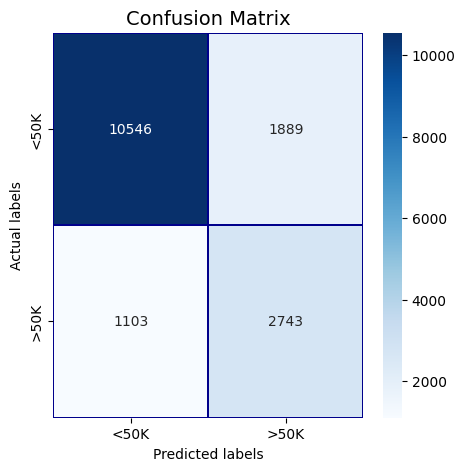

In [77]:
y_hail_mary = hailMary.predict(X_testSet)
print("Classification Report:")
print(classification_report(y_testSet, y_hail_mary))

#visualize correct and incorrect predictions for each class, helping us identify where the model struggles
print("Confusion Matrix:")
print(confusion_matrix(y_testSet, y_hail_mary))
accuracy = hailMary.score(X_testSet, y_testSet)
print(f"Model Accuracy: {accuracy}")









cm_val = pd.crosstab(y_testSet, y_hail_mary, rownames=['Actual labels'], colnames=['Predicted labels'])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_val, 
            xticklabels=["<50K", '>50K'],
            yticklabels=['<50K', '>50K'],
            annot=True, 
            fmt='d',
            linewidths=.2, 
            linecolor="Darkblue", 
            cmap="Blues",
            ax=ax)
plt.title('Confusion Matrix', fontsize=14)
plt.show()